In [31]:
import random

In [32]:
def rollDie(): #random zar atma
    return random.choice([1,2,3,4,5,6])

In [33]:
def rollN(n): #kaç kez zar atıcağımızı ve gelen zar değerlerini ekrana bastırıyor.
    result=''
    for i in range(n):
        result=result+str(rollDie())
    print(result)

In [34]:
rollN(5)

61564


In [35]:
def flip(numFlips): #yazı, tura || H=Tura, T=Yazı
    heads=0 
    for i in range(numFlips):
        if random.choice(('H','T'))=='H':
            heads+=1
    return heads/numFlips #Tura gelme oranı

In [36]:
flip(10)

0.6

In [37]:
def flipSim(numFlipsPerTrial,numTrials): #numFlipsPerTrial: Flip fonksiyonu için paranın kaç kez atılacağını belirler. || numTrials: Deney sayısını belirler.
    fracHeads=[]
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean=sum(fracHeads)/len(fracHeads) #Deney sayısına göre Tura gelme oranı.
    return mean

In [38]:
flipSim(100,1000) #Ne kadar çok denersek gerçek ortalamasına o kadar yaklaşırız.

0.5003800000000002

In [39]:
import pylab

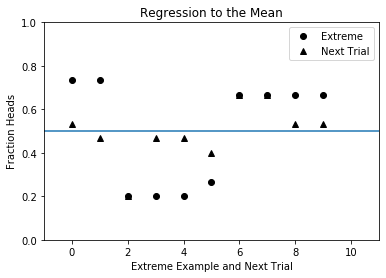

In [52]:
def regressToMean(numFlips,numTrials): #Zamanla fonksiyonumuzun 0.5 değerine ulaştığını görmek için yazdık.
    #Gerçek paranın popilasyonuna ulaşırız.
    fracHeads=[]
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    
    extremes, nextTrials=[],[]
    for i in range(len(fracHeads)-1):
        if fracHeads[i]< 0.33 or fracHeads[i]>0.66: #bu değerlere giren değerlerin uç noktaları olduğunu bir sonraki değerleri ile
            extremes.append((fracHeads[i]))  #sınır.
            nextTrials.append((fracHeads[i+1])) #bir sonraki deneme
    #Amaç extremes noktaların zamanla azaldığını göstermek.        
    #plot result
    pylab.plot(range(len(extremes)),extremes,'ko',label='Extreme')
    pylab.plot(range(len(nextTrials)),nextTrials,'k^',label='Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0,1)
    pylab.xlim(-1,len(extremes)+1)
    pylab.xlabel('Extreme Example and Next Trial') #Aşırı örnek ve bir sonraki deneme
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc='best')

regressToMean(15,40)

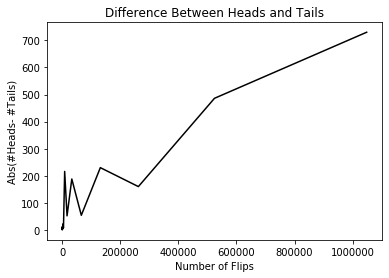

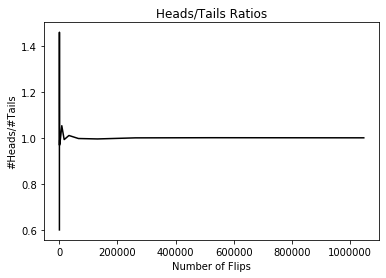

In [41]:
def flipPlot(minExp,maxExp):
    ratios,diffs,xAxis=[],[],[] #ratios=oranları, diffs=farkları, xAxis= Anlık deney sayısı.
    for exp in range(minExp,maxExp+1):
        xAxis.append(2**exp)#2 üzeri kaç tane deney olduğunu belirliyor aralığımıza göre.
    for numFlips in xAxis:
        numHeads=0
        for n in range(numFlips):
            if random.choice(('H','T'))=='H':
                numHeads+=1
        numTails=numFlips-numHeads #tura sayısı
        try: #0' a bölme hatası için koyuldu.
            ratios.append(numHeads/numTails) #yazı tura oranı
            diffs.append(abs(numHeads-numTails)) #yazı tura farkı
        except ZeroDivisionError:
            continue
    #plot result
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads- #Tails)')
    pylab.plot(xAxis,diffs,'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis,ratios,'k')
# random.seed() methodunun amacı hata ayıklamayı daha kolay yapılmasını sağlamaktır.   
random.seed(0)
flipPlot(4,20)
    
    

In [ ]:
#varyans hesaplamak için:
"""
1-)A.O. bul.(topla hepsini sonra sayı adetine böl)
2-)Her veriden A.O. çıkar
3-)Sonuçların karelerini topla
4-)Veri sayısının bir eksiğine böl.
"""

In [ ]:
#Standart Sapma: Varyansın Karekökünü al.
"""
Standart sapma yükseldikçe tutarlılık azalır, Standart sapmamız azaldıkça ise tutarlılık artar.

Rassal değişken: Rastgele gerçekleşen olaylar.(Zar atma, para atma,...)

Varyans: Bir olasılık dağılımı veya örneklem için istatistiksel yayılımın, mümkün bütün değerlerinin beklenen değer veya ortalamadan uzaklıklarının karelerinin ortalaması şeklinde bulunan bir ölçüdür.

Standart Sapma: Veri değerlerinin yayılımının özetlenmesi için kullanılan bir ölçüdür.

"""

In [42]:
def variance(X): #varyans hesaplamak için.:
    mean=sum(X)/len(X)
    tot=0.0
    for x in X:
        tot+=(x-mean)**2
    return tot/len(X)  

In [43]:
def stdDev(X):#standart sapması.
    return variance(X)**0.5
    

In [44]:
def makePlot(xVals,yVals,title,xLabel,yLabel,style,logX=False,logY=False): #grafik çizmek için.
    #logX ve logY grafiklerde ölçekleme yapıyor diyebiliriz. Mesela 10^5 kullanma yerine log'unu alıp kullanıyor.
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals,yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
    

In [45]:
def runTrial(numFlips): #Yazı, tura sayısı.
    numHeads=0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads+=1
    numTails=numFlips-numHeads
    return (numHeads,numTails)

In [48]:
def flipPlot1(minExp,maxExp,numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs= [],[],[],[] #Means: Ortalamaları, SD:standart sapmaları.
    xAxis=[]
    for exp in range(minExp,maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios,diffs=[],[]
        for t in range(numTrials):
            numHeads,numTails=runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads-numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString='('+str(numTrials)+'Trials)'
    
    title='Mean Heads/Tails Ratios'+numTrialsString
    makePlot(xAxis,ratiosMeans,title,'Number of flips','Mean Heads/Tails','ko',logX=True) #gitgide  oranlarının ortalaması stabil degere yaklaşır.
    
    title='SD Heads/Tails Ratios'+numTrialsString
    makePlot(xAxis,ratiosSDs,title,'Number of Flips','Standart Deviation','ko',logX=True,logY=True) #Standart sapma değeri büyüdükçe tutarlılık azalır, düşük oldukça tutarlılığı artar.
    
    
    

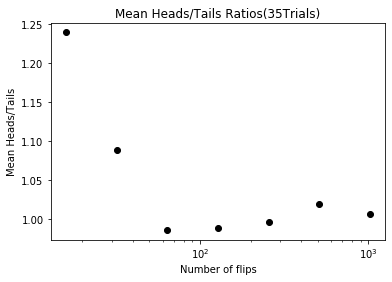

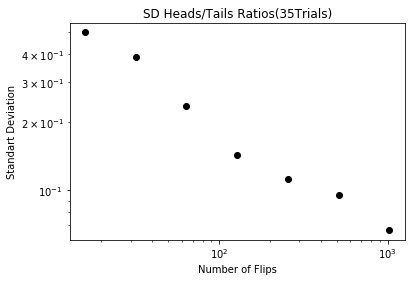

In [54]:
flipPlot1(4,10,35)
#İlk grafiğe bakarsak eğer Mean değeri git gide stabil değere yaklaşıyor.
#İkinci grafiğimizde ise standart sapmamız git gide azalıyor çünkü standart sapma azaldıkça tutarlılık artıyor. 